# linA Growth Rates (`tlim = 2`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read

### Max./Min. Densities (`rho` & `rhop`)

In [2]:
# linA
epsilon = 3.0 # average density ratio of particles to gas in background state

# retrieve max densities across outputs
times = np.zeros(2001)
rhomax = np.zeros(2001)
rhomin = np.zeros(2001)
rhopmax = np.zeros(2001)
rhopmin = np.zeros(2001)

for i in range(2001):
    fname = 'run03/athdf/SI.out1.' + str(i).zfill(5) + '.athdf'
    data = athena_read.athdf(fname)
    times[i] = data['Time']
    rhomax[i] = np.amax(data['rho']) - 1
    rhomin[i] = 1 - np.amin(data['rho'])
    rhopmax[i] = np.amax(data['rhop']) - epsilon # difference w/ epsilon
    rhopmin[i] = epsilon - np.amin(data['rhop'])

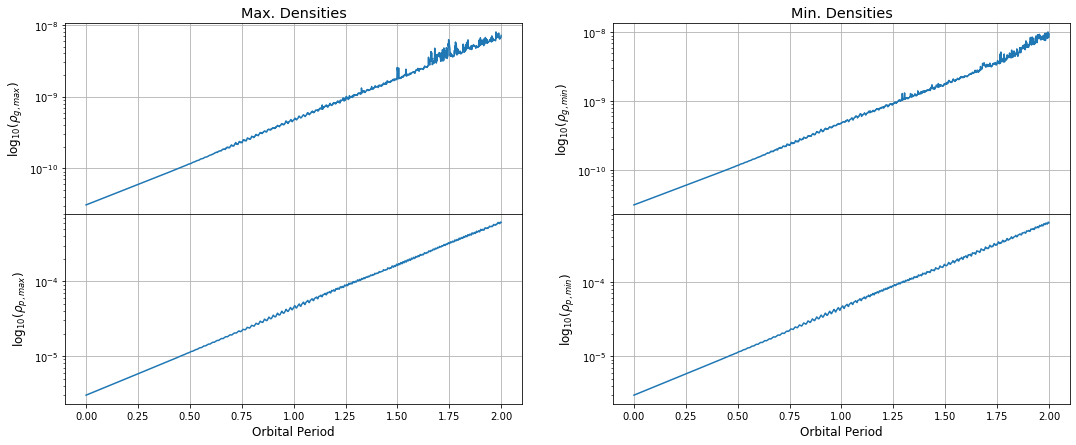

In [3]:
# plot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(18,7),
                        gridspec_kw={'hspace': 0})

# upper-left subplot
axs[0,0].set_title(r'Max. Densities', size='x-large')
axs[0,0].set_ylabel(r'$\log_{10}(\rho_{g,max})$', size='large')
axs[0,0].semilogy(times, rhomax)
# lower-left subplot
axs[1,0].set_ylabel(r'$\log_{10}(\rho_{p,max})$', size='large')
axs[1,0].set_xlabel('Orbital Period', size='large')
axs[1,0].semilogy(times, rhopmax)
# upper-right subplot
axs[0,1].set_title(r'Min. Densities', size='x-large')
axs[0,1].set_ylabel(r'$\log_{10}(\rho_{g,min})$', size='large')
axs[0,1].semilogy(times, rhomin)
# lower-left subplot
axs[1,1].set_ylabel(r'$\log_{10}(\rho_{p,min})$', size='large')
axs[1,1].set_xlabel('Orbital Period', size='large')
axs[1,1].semilogy(times, rhopmin)

for i,ax in enumerate(axs.flat):
    ax.grid()